<a href="https://colab.research.google.com/github/AlineLataro/Desafio_Alura_TelecomX_ONE-/blob/main/TeleconX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Relatório de Análise de Churn — Telecom X

## 1. Introdução

A **Telecom X** enfrenta um problema significativo de evasão de clientes, conhecido como **churn**, que impacta negativamente sua receita e crescimento.  
O objetivo desta análise é identificar os fatores que contribuem para o cancelamento dos contratos, utilizando técnicas de **análise exploratória de dados**.  
Compreender esses fatores permitirá que a equipe de Data Science desenvolva modelos preditivos e estratégias para **reduzir a evasão**.

---

## 2. Limpeza e Tratamento de Dados

Os dados foram obtidos de uma fonte online contendo informações detalhadas dos clientes, incluindo dados demográficos, serviços contratados, faturamento e status de cancelamento.

As principais etapas de limpeza e tratamento foram:

- 🔄 **Desempacotamento** de colunas com dados aninhados (dicionários) para transformar em um formato tabular.
- 🧼 **Preenchimento de valores faltantes** na coluna `Churn` com `'Não'`, garantindo a completude dos dados.
- 🔢 **Conversão de colunas categóricas** do formato `'Yes'/'No'` para valores binários `1/0` para facilitar análises numéricas.
- 🌍 **Tradução das colunas** para o português para melhorar a compreensão.
- ➗ **Criação da coluna `Contas_Diarias`**, que calcula o gasto médio diário a partir do faturamento mensal.

Esses passos garantiram um conjunto de dados **limpo e padronizado**, pronto para análise.

---

## 3. Análise Exploratória de Dados

### 3.1 Distribuição de Churn

Foi verificada a **proporção de clientes que cancelaram versus os que permaneceram**, mostrando que aproximadamente **25,7% dos clientes** cancelaram o serviço.


---

### 3.2 Análise de Churn por Variáveis Categóricas

Foi avaliada a taxa de cancelamento para diferentes categorias, como:

- Idoso
- Tipo de contrato
- Método de pagamento
- Tempo de contrato
- Entre outros

#### Principais achados:

- 📅 **Contratos do tipo mensal** apresentaram maior churn comparado a contratos de longo prazo.
- 💳 **Métodos de pagamento** específicos também mostraram maior propensão ao cancelamento.
- **Clientes com 12 meses ou menos**, apresentaram maior número de cancelamentos


---

### 3.3 Análise de Variáveis Numéricas

 - Clientes de contrato mensal são os mais propensos a cancelar.

 - Clientes com maior tempo de contrato demonstram uma propensão muito menor ao cancelamento.

 - Os dados indicam que o gasto mensal não apresenta correlação significativa com o churn, enquanto o tempo de contrato tem uma correlação negativa relevante, sugerindo que clientes com maior tempo de permanência têm menor probabilidade de cancelamento.

 - Variáveis como Idoso não possuem impacto relevante no churn.

 - A análise revelou que clientes que utilizam o método "Pagamento Eletrônico" apresentam uma taxa de churn mais elevada em comparação aos demais métodos de pagamento.
---

## 4. Conclusões e Insights

- Incentivo de contratos de longo prazo: Campanhas para migração de clientes de contrato mensal para anual ou bienal podem reduzir significativamente a evasão.

- Benefícios para clientes novos: Programas de fidelização, descontos nos primeiros meses ou serviços bônus.

- Favorecimento para pagamentos com cartão para aumentar a fidelização do cliente

---

## 5. Recomendações

- 📌 **Incentivar contratos de longo prazo**, oferecendo benefícios que reduzam a tentação do cancelamento mensal.
- 🧾 **Avaliar os métodos de pagamento** e oferecer alternativas mais atrativas para os clientes que optarem por pagamento automático ou no cartão, que geram um menor número de churn.
- 🔍 Monitorar **clientes com baixo gasto e contratos curtos**, oferecendo promoções e vantagens exclusivas para aumentar a retenção.





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)


In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Normalização cada coluna com dicionários
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Colunas restantes (como Churn)
df_other = df.drop(columns=['customer', 'phone', 'internet', 'account'])


In [4]:
# Concatenação de todas as partes
df = pd.concat([df_customer, df_phone, df_internet, df_account, df_other], axis=1)


In [5]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   PhoneService      7267 non-null   object 
 6   MultipleLines     7267 non-null   object 
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,customerID,Churn
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,0002-ORFBO,No
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,0003-MKNFE,No
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,0004-TLHLJ,Yes
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,0011-IGKFF,Yes
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,0013-EXCHZ,Yes


In [6]:
# Verificação de valores ausentes por coluna
df.isnull().sum().sort_values(ascending=False)


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [7]:
# Conferindo os tipos de cada coluna
df.dtypes


,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [8]:
# Verificação de valores únicos para identificar padrões ou problemas
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nColuna: {col}")
        print(df[col].value_counts())



Coluna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64

Coluna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Coluna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Coluna: PhoneService
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Coluna: MultipleLines
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Coluna: InternetService
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Coluna: OnlineSecurity
OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64

Coluna: OnlineBackup
OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64

Coluna: DeviceProtection
DeviceProtection
No                     3195
Yes                    2491
No internet service   

In [9]:
#Substituição de valores nulos ou vazios
df['Churn'] = df['Churn'].fillna('No')



In [10]:
# Contagem dos Valores do Churn
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869
,224


In [11]:
# Verificação de valores vazios no Churn
df['Churn'].isnull().sum()


np.int64(0)

In [12]:
# Identificando identificando valores vazios no Churn
df['Churn'] = df['Churn'].replace(r'^\s*$', np.nan, regex=True)


In [13]:
# Identificando os valores NAN no Churn e sobstituindo por NO
df['Churn'] = df['Churn'].fillna('No')


In [14]:
# Contagem dos valores totais
df['Churn'].value_counts()


,count
Churn,
No,5398
Yes,1869


In [15]:
# Tratamento da coluna Charges Total, mudança do tipo String para Float/Int, substituição da virgula para ponto nas casas decimais
# transformação de valores que não podem ser float ou int em NAN e substituição da coluna Total Charges Original

df['Charges.Total'] = pd.to_numeric(df['Charges.Total'].str.replace(',', '.'), errors='coerce')


In [16]:
# Visualização das colunas Tempo de contrato, Cobrança mensal e Cobrança Total
print(df[['tenure', 'Charges.Monthly', 'Charges.Total']].describe())


            tenure  Charges.Monthly  Charges.Total
count  7267.000000      7267.000000    7256.000000
mean     32.346498        64.720098    2280.634213
std      24.571773        30.129572    2268.632997
min       0.000000        18.250000      18.800000
25%       9.000000        35.425000     400.225000
50%      29.000000        70.300000    1391.000000
75%      55.000000        89.875000    3785.300000
max      72.000000       118.750000    8684.800000


In [17]:
# Distribuição de dados categóricos em cada coluna

categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

for col in categorical_cols:
    print(f"\nColuna: {col}")
    print(df[col].value_counts(dropna=False))


Coluna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64

Coluna: SeniorCitizen
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

Coluna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Coluna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Coluna: PhoneService
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Coluna: MultipleLines
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Coluna: InternetService
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Coluna: OnlineSecurity
OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64

Coluna: OnlineBackup
OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64

Coluna: DeviceProtection
DeviceProtec

In [18]:
# Cálculo das contas diárias
df['Contas_Diarias'] = df['Charges.Monthly'] / 30


In [19]:
# Visualização das contas diárias e mensais
df[['Charges.Monthly', 'Contas_Diarias']].head()


,Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [20]:
# Renomeação dos titulos das colunas para nomes traduzidos para o português
df.rename(columns={
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Parceiro',
    'Dependents': 'Dependentes',
    'tenure': 'Tempo_Contrato',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Linhas_Multiples',
    'InternetService': 'Servico_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Faturamento_Eletronico',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Faturamento_Mensal',
    'Charges.Total': 'Faturamento_Total',
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelou'
}, inplace=True)


In [21]:
# Colunas que provavelmente têm 'Yes' e 'No'
cols_yes_no = [
    'Parceiro', 'Dependentes', 'Servico_Telefone', 'Linhas_Multiples', 'Seguranca_Online',
    'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV',
    'Streaming_Filmes', 'Faturamento_Eletronico', 'Cancelou'
]

# Substituir
df[cols_yes_no] = df[cols_yes_no].replace({'Yes': 1, 'No': 0})


/tmp/ipython-input-1678390289.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_yes_no] = df[cols_yes_no].replace({'Yes': 1, 'No': 0})


In [22]:
df.head()

,Genero,Idoso,Parceiro,Dependentes,Tempo_Contrato,Servico_Telefone,Linhas_Multiples,Servico_Internet,Seguranca_Online,Backup_Online,...,Streaming_TV,Streaming_Filmes,Contrato,Faturamento_Eletronico,Metodo_Pagamento,Faturamento_Mensal,Faturamento_Total,ID_Cliente,Cancelou,Contas_Diarias
0,Female,0,1,1,9,1,0,DSL,0,1,...,1,0,One year,1,Mailed check,65.6,593.30,0002-ORFBO,0,2.186667
1,Male,0,0,0,9,1,1,DSL,0,0,...,0,1,Month-to-month,0,Mailed check,59.9,542.40,0003-MKNFE,0,1.996667
2,Male,0,0,0,4,1,0,Fiber optic,0,0,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,0004-TLHLJ,1,2.463333
3,Male,1,1,0,13,1,0,Fiber optic,0,1,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,0011-IGKFF,1,3.266667
4,Female,1,1,0,3,1,0,Fiber optic,0,0,...,1,0,Month-to-month,1,Mailed check,83.9,267.40,0013-EXCHZ,1,2.796667


In [23]:
# Estatísticas descritivas das colunas numéricas
df[['Tempo_Contrato', 'Faturamento_Mensal', 'Faturamento_Total', 'Contas_Diarias']].describe()


,Tempo_Contrato,Faturamento_Mensal,Faturamento_Total,Contas_Diarias
count,7267.000000,7267.000000,7256.000000,7267.000000
mean,32.346498,64.720098,2280.634213,2.157337
std,24.571773,30.129572,2268.632997,1.004319
min,0.000000,18.250000,18.800000,0.608333
25%,9.000000,35.425000,400.225000,1.180833
50%,29.000000,70.300000,1391.000000,2.343333
75%,55.000000,89.875000,3785.300000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


In [24]:
# Resumo estatístico das principais medidas para essas variáveis numéricas

df[['Tempo_Contrato', 'Faturamento_Mensal', 'Faturamento_Total', 'Contas_Diarias']].agg(
    ['mean', 'median', 'std', 'min', 'max']
)


,Tempo_Contrato,Faturamento_Mensal,Faturamento_Total,Contas_Diarias
mean,32.346498,64.720098,2280.634213,2.157337
median,29.000000,70.300000,1391.000000,2.343333
std,24.571773,30.129572,2268.632997,1.004319
min,0.000000,18.250000,18.800000,0.608333
max,72.000000,118.750000,8684.800000,3.958333


In [25]:
#Distribuição percentual dos valores para a coluna Churn

df['Cancelou'].value_counts(normalize=True).map('{:.2%}'.format)


,proportion
Cancelou,
0,74.28%
1,25.72%


In [26]:
#Distribuição percentual de cada categoria

colunas_categoricas = ['Genero', 'Idoso', 'Parceiro', 'Dependentes', 'Servico_Telefone',
                       'Servico_Internet', 'Contrato', 'Metodo_Pagamento']

for col in colunas_categoricas:
    print(f"\nColuna: {col}")
    print(df[col].value_counts(normalize=True).map('{:.2%}'.format))



Coluna: Genero
Genero
Male      50.57%
Female    49.43%
Name: proportion, dtype: object

Coluna: Idoso
Idoso
0    83.73%
1    16.27%
Name: proportion, dtype: object

Coluna: Parceiro
Parceiro
0    51.59%
1    48.41%
Name: proportion, dtype: object

Coluna: Dependentes
Dependentes
0    69.99%
1    30.01%
Name: proportion, dtype: object

Coluna: Servico_Telefone
Servico_Telefone
1    90.27%
0     9.73%
Name: proportion, dtype: object

Coluna: Servico_Internet
Servico_Internet
Fiber optic    44.01%
DSL            34.24%
No             21.76%
Name: proportion, dtype: object

Coluna: Contrato
Contrato
Month-to-month    55.11%
Two year          23.99%
One year          20.90%
Name: proportion, dtype: object

Coluna: Metodo_Pagamento
Metodo_Pagamento
Electronic check             33.65%
Mailed check                 22.91%
Bank transfer (automatic)    21.87%
Credit card (automatic)      21.58%
Name: proportion, dtype: object


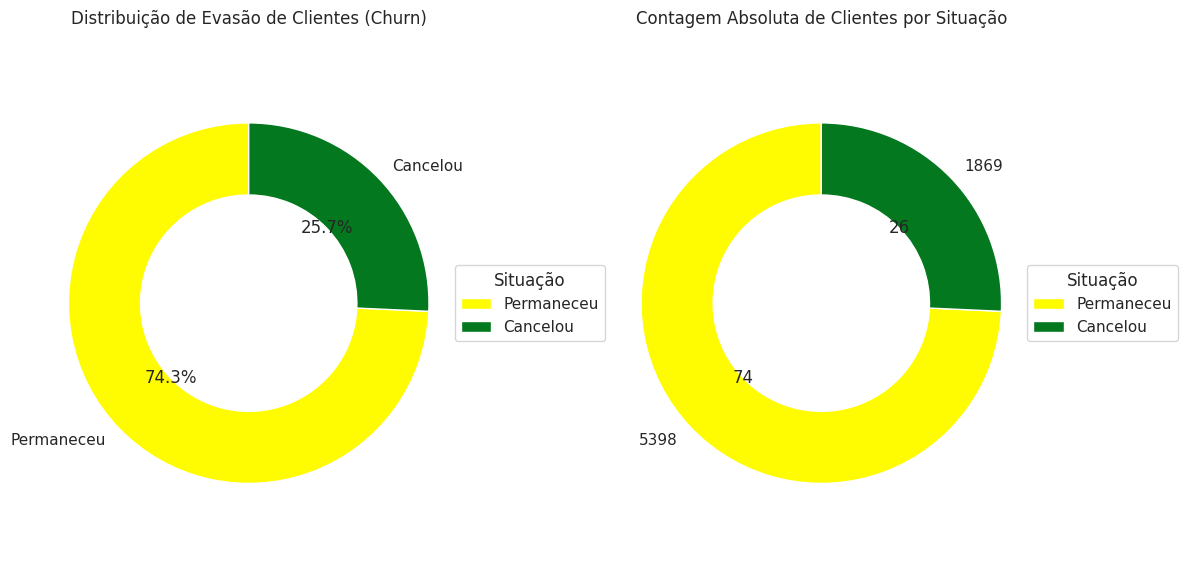

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ajuste do estilo dos gráficos
sns.set(style="whitegrid")

# Contagem dos valores
churn_counts = df['Cancelou'].value_counts()
labels = ['Permaneceu', 'Cancelou']
colors = ['#fffb00', '#04781f']  # amarelo e verde

# Criação do diretório Gráficos
if not os.path.exists('graficos'):
    os.makedirs('graficos')

# 📌 Cria a figura com dois gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 📌 Gráfico de rosca 1 (Distribuição)
wedges1, texts1, autotexts1 = axes[0].pie(
    churn_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4}
)
axes[0].axis('equal')
axes[0].set_title('Distribuição de Evasão de Clientes (Churn)', fontsize=12)
axes[0].legend(wedges1, labels, title="Situação", loc="center left", bbox_to_anchor=(1, 0.5))

# 📌 Gráfico de rosca 2 (Contagem absoluta)
wedges2, texts2, autotexts2 = axes[1].pie(
    churn_counts,
    labels=churn_counts,
    autopct='%1.0f',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4}
)
axes[1].axis('equal')
axes[1].set_title('Contagem Absoluta de Clientes por Situação', fontsize=12)
axes[1].legend(wedges2, labels, title="Situação", loc="center left", bbox_to_anchor=(1, 0.5))

# 📌 Salva gráfico
plt.tight_layout()
plt.savefig("graficos/graficos_roda_churn_lado_a_lado.png", dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipython-input-967776859.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index, y=distrib.values, palette=cores, ax=ax)
/tmp/ipython-input-967776859.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=coluna)
/tmp/ipython-input-967776859.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index, y=distrib.values, palette=cores, ax=ax)
/tmp/ipython-input-967776859.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called 

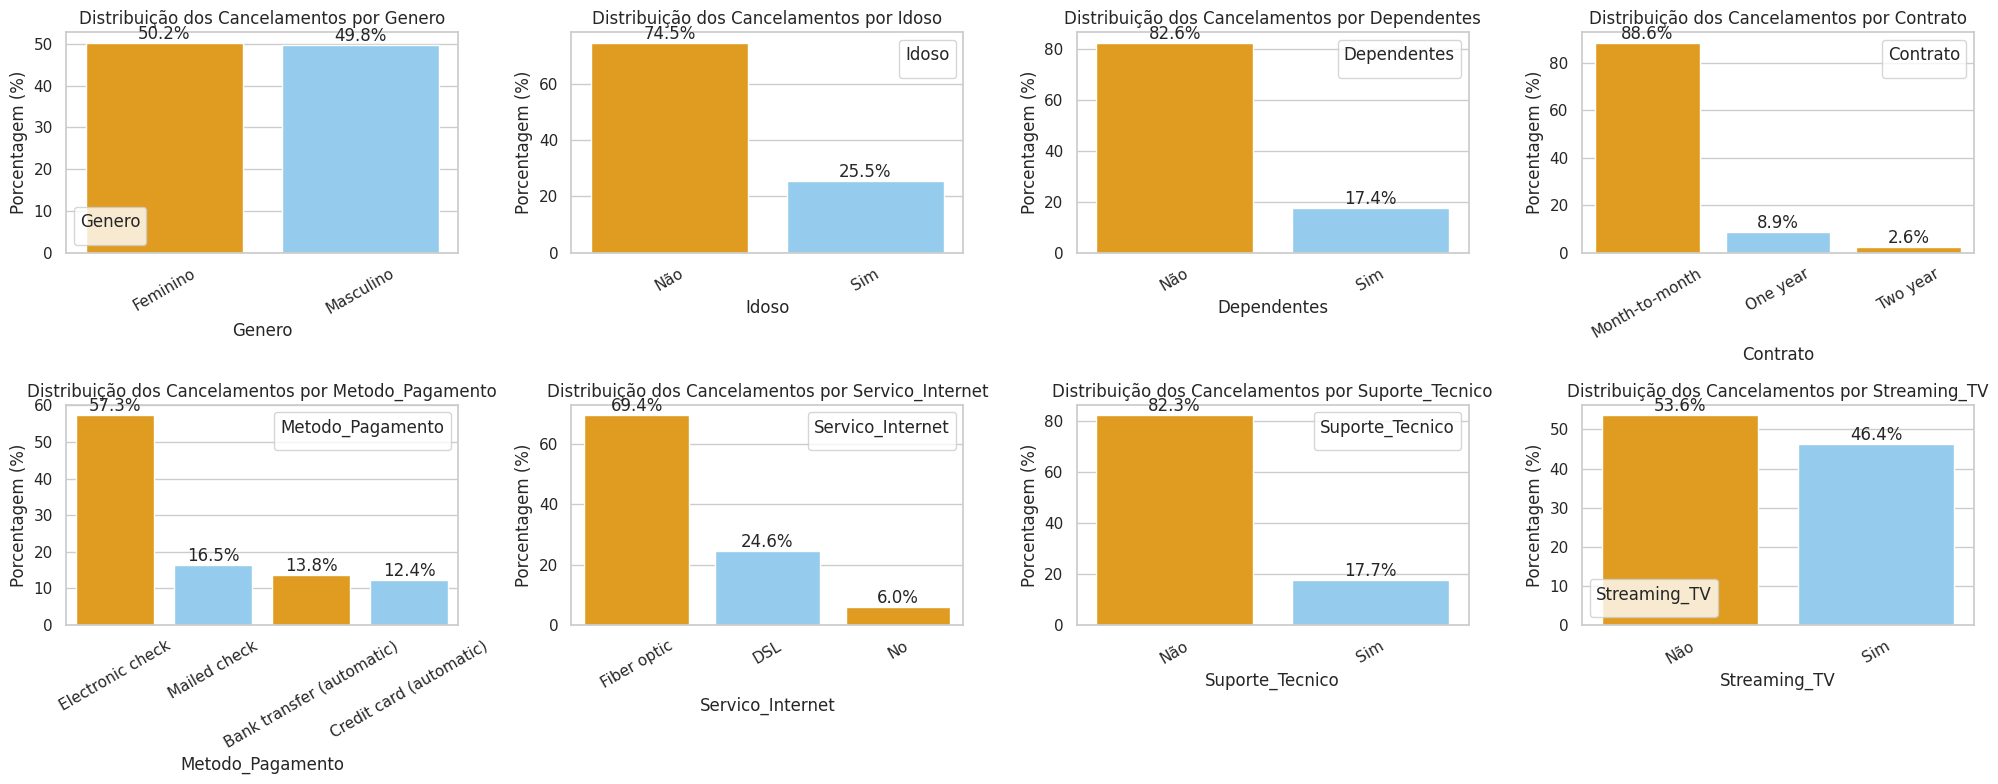

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Copia o DataFrame para evitar alteração do original
df_churn = df[df['Cancelou'] == 1].copy()

# MPersonalização dos mapeamentos
mapeamentos = {
    'Genero': {'Male': 'Masculino', 'Female': 'Feminino'},
    'Idoso': {1: 'Sim', 0: 'Não'},
    'Dependentes': {1: 'Sim', 0: 'Não'},
    'Contrato': {},  # Mantém como está
    'Metodo_Pagamento': {},  # Mantém como está
    'Servico_Internet': {},  # Mantém como está
    'Suporte_Tecnico': {1: 'Sim', 0: 'Não'},
    'Streaming_TV': {1: 'Sim', 0: 'Não'},

}

# Aplicação dos mapeamentos
for coluna, mapa in mapeamentos.items():
    if mapa:  # só aplica se tiver mapeamento
        df_churn[coluna] = df_churn[coluna].map(mapa)

# Lista das colunas analisadas
colunas = list(mapeamentos.keys())

# Cores do gráfico
cores = ['#FFA500', '#87CEFA']  # laranja e azul claro

# Configuração do layout dos subplots
n_colunas = 4  # quantos gráficos por linha
n_linhas = math.ceil(len(colunas) / n_colunas)

fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(n_colunas * 5, n_linhas * 4))
axs = axs.flatten()

for i, coluna in enumerate(colunas):
    # Calculo da porcentagem
    distrib = df_churn[coluna].value_counts(normalize=True).sort_values(ascending=False) * 100

    # Plotar no subplot correspondente
    ax = axs[i]
    sns.barplot(x=distrib.index, y=distrib.values, palette=cores, ax=ax)
    ax.set_title(f'Distribuição dos Cancelamentos por {coluna}')
    ax.set_ylabel('Porcentagem (%)')
    ax.set_xlabel(coluna)
    ax.tick_params(axis='x', rotation=30)

    # Adiciona os valores das barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')

    ax.legend(title=coluna)

# Se sobrar algum eixo vazio, desliga ele
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


/tmp/ipython-input-119881078.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distrib.index, y=distrib.values, palette='Blues_d', ax=axs[0, 0])
/tmp/ipython-input-119881078.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 1].legend(title='Cancelou')


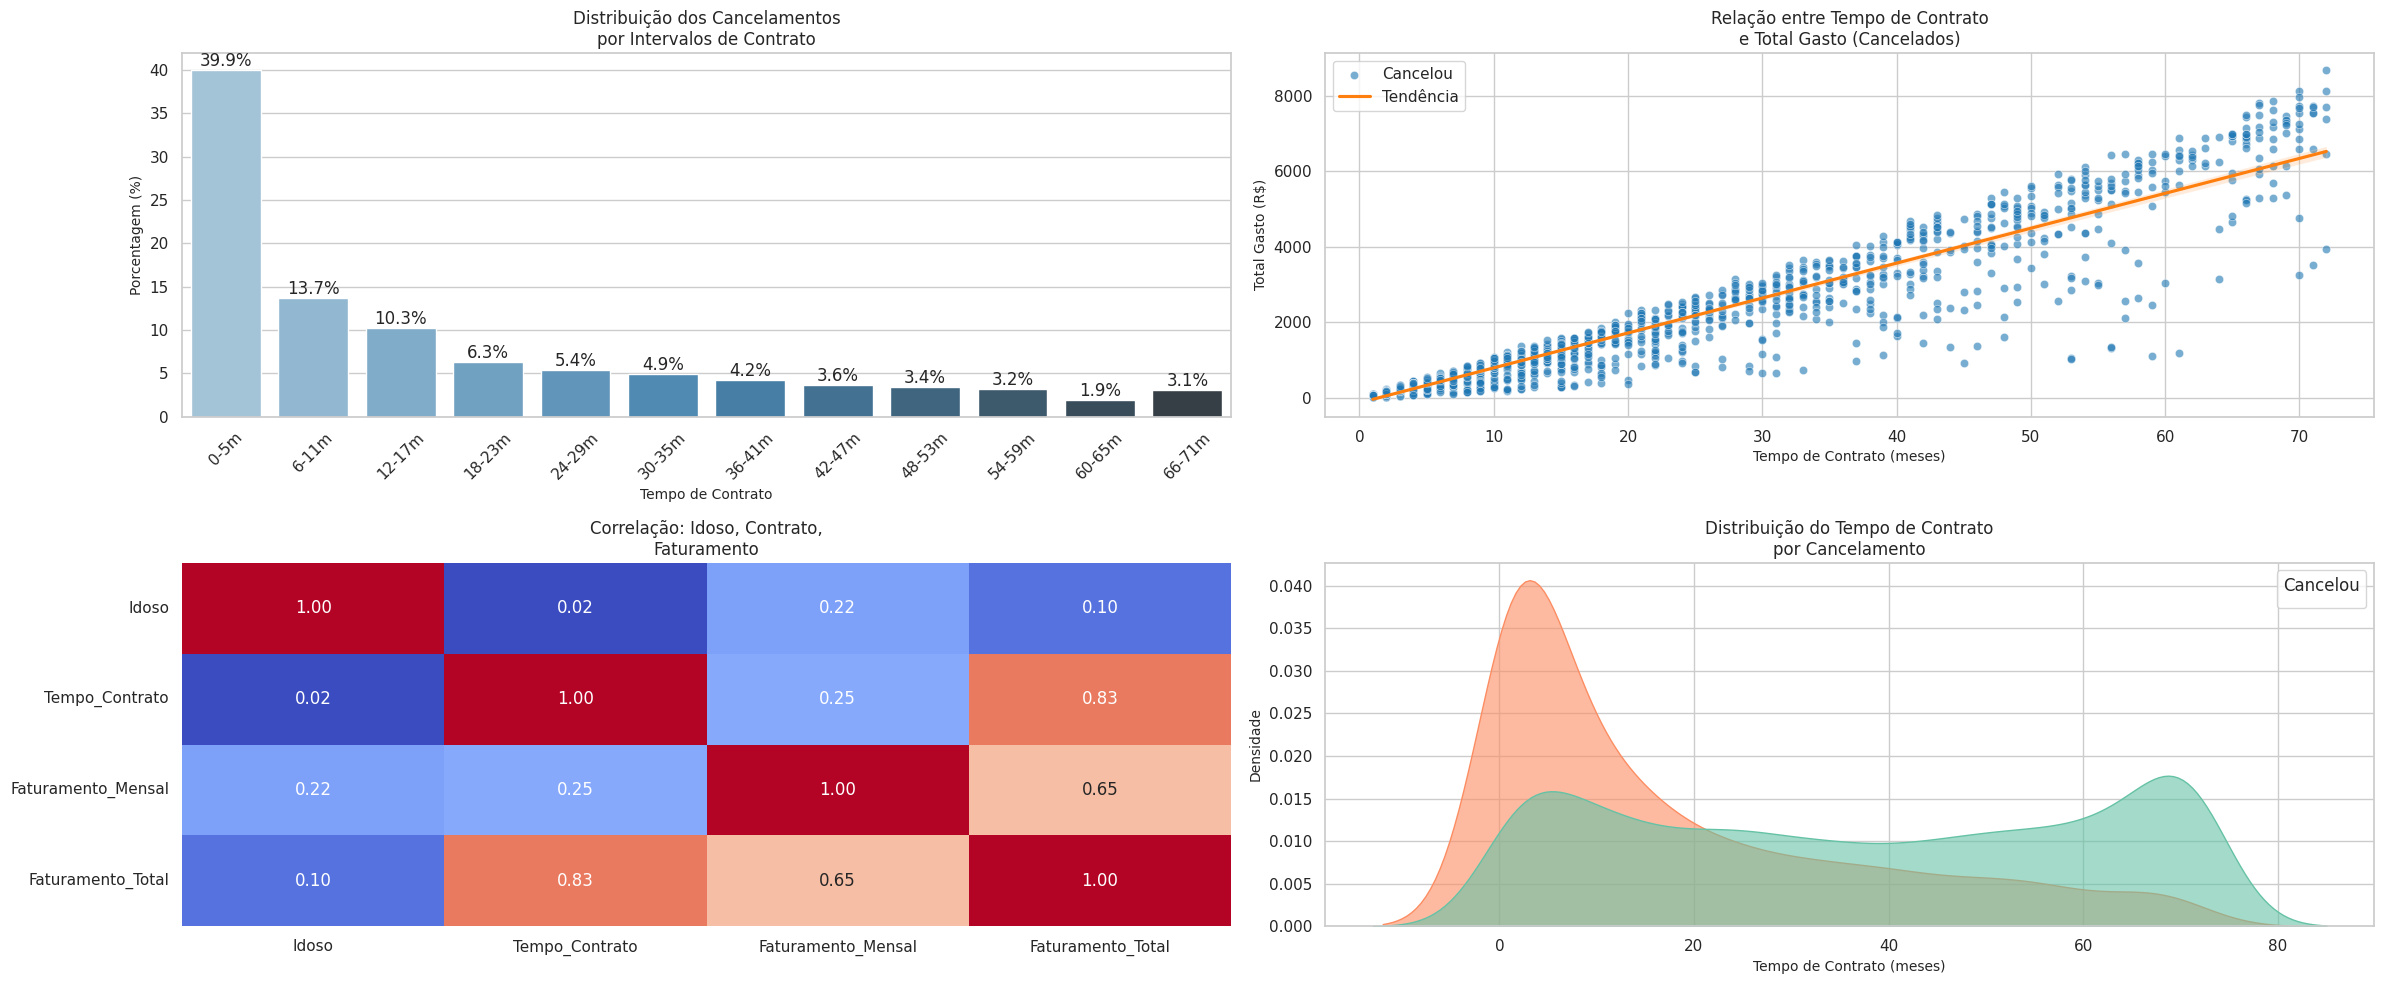

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Filtra só os clientes que cancelaram
df_churn = df[df['Cancelou'] == 1].copy()

# 2. Define os intervalos de 6 em 6 meses para Tempo_Contrato
bins = list(range(0, df_churn['Tempo_Contrato'].max() + 6, 6))
labels = [f'{bins[i]}-{bins[i+1]-1}m' for i in range(len(bins)-1)]

# 3. Cria a nova coluna categorizada
df_churn['Tempo_Contrato_Intervalo'] = pd.cut(df_churn['Tempo_Contrato'], bins=bins, labels=labels, right=False, include_lowest=True)

# 4. Calcula a porcentagem para cada intervalo
distrib = df_churn['Tempo_Contrato_Intervalo'].value_counts(normalize=True).sort_index() * 100

# 5. Prepara a figura com 4 subplots em 1 linha
fig, axs = plt.subplots(2, 2, figsize=(24, 10))  # 2 linha, 2 colunas

# -------------------------------
# Gráfico 1: Barras por intervalo
sns.barplot(x=distrib.index, y=distrib.values, palette='Blues_d', ax=axs[0, 0])
axs[0, 0].set_title('Distribuição dos Cancelamentos\npor Intervalos de Contrato', fontsize=12)
axs[0, 0].set_xlabel('Tempo de Contrato', fontsize=10)
axs[0, 0].set_ylabel('Porcentagem (%)', fontsize=10)
axs[0, 0].tick_params(axis='x', rotation=45)
for container in axs[0, 0].containers:
    axs[0, 0].bar_label(container, fmt='%.1f%%')

# -------------------------------
# Gráfico 2: Scatter + linha de tendência
sns.scatterplot(data=df_churn, x='Tempo_Contrato', y='Faturamento_Total', color='#1f77b4', alpha=0.6, ax=axs[0, 1], label='Cancelou')
sns.regplot(data=df_churn, x='Tempo_Contrato', y='Faturamento_Total', scatter=False, color='#ff7f0e', ax=axs[0, 1], label='Tendência')
axs[0, 1].set_title('Relação entre Tempo de Contrato\ne Total Gasto (Cancelados)', fontsize=12)
axs[0, 1].set_xlabel('Tempo de Contrato (meses)', fontsize=10)
axs[0, 1].set_ylabel('Total Gasto (R$)', fontsize=10)
axs[0, 1].legend()

# -------------------------------
# Gráfico 3: Distribuição do Tempo de Contrato por Cancelamento
sns.kdeplot(data=df, x='Tempo_Contrato', hue='Cancelou', fill=True, common_norm=False, palette='Set2', alpha=0.6, ax=axs[1, 1])
axs[1, 1].set_title('Distribuição do Tempo de Contrato\npor Cancelamento', fontsize=12)
axs[1, 1].set_xlabel('Tempo de Contrato (meses)', fontsize=10)
axs[1, 1].set_ylabel('Densidade', fontsize=10)
axs[1, 1].legend(title='Cancelou')

# -------------------------------
# Gráfico 4: Heatmap de Correlação
df_corr = df[['Idoso', 'Tempo_Contrato', 'Faturamento_Mensal', 'Faturamento_Total']].copy()
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=False, ax=axs[1, 0])
axs[1, 0].set_title('Correlação: Idoso, Contrato,\nFaturamento', fontsize=12)

# Ajustes finais
plt.tight_layout()
plt.show()